# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Reshaping y, becaues feature scaling can only be done to 2D Array
y = y.reshape(len(y),1)

## Feature Scaling

In [4]:
# For linear regression models(Linear,Multiple,Polynomial), feauture scaling is not needed because it has those coefficients
# that can compensate with the high values of the feautures 

# Whereas for SVM,there is an implicit relationship between the dependent variable and the feautures, therefor feauture scaling
# is MANDATORY

from sklearn.preprocessing import StandardScaler

# Two different objects are created, because the dependent and features will have diff mean and standard deviation
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_Y.fit_transform(y)

In [5]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [6]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\adhri\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [8]:
# The input must be a scaled, because the model was trained on scaled dataset
# regressor.predict(scaler1.fit_transform([[6.5]]))
# the problem here is that the predicted value will also be scaled, we don't want that, so we apply inverse scaling(original scaling) to the predicted value 
# if the dependent variable was not scaled i.e the values of the dependent variable alredy lied b/w -1 and 1, no need to apply inverse transform

scaler_Y.inverse_transform(regressor.predict(scaler_X.fit_transform([[6.5]])).reshape(-1,1))

array([[131106.77303274]])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

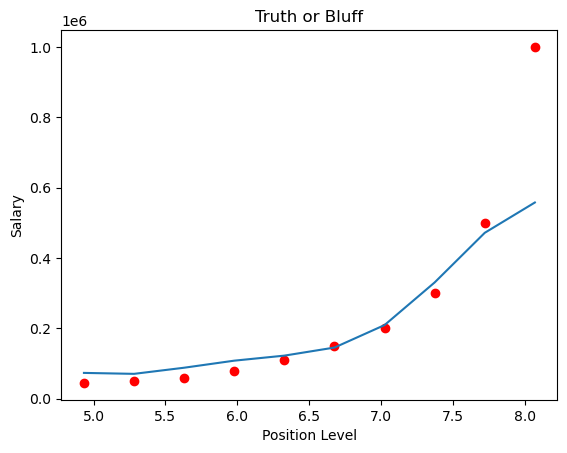

In [12]:
#Original Values
rev_X = scaler_X.inverse_transform(X)
rev_y = scaler_Y.inverse_transform(y)
plt.scatter(rev_X,rev_y,color="red")

# Predicted Values
plt.plot(rev_X,scaler_Y.inverse_transform(regressor.predict(X).reshape(-1,1)))

plt.title('Truth or Bluff')
plt.xlabel('Position Level')
plt.ylabel('Salary')